In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=(11,6)
rcParams['axes.labelsize'] = 20
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize']=20

rcParams["font.family"] = "serif"
rcParams["font.serif"] = "STIX"
rcParams["mathtext.fontset"] = "stix"


In [2]:
#injected radius=11.86984

radius_accuracy={'10m':0.00084,'50m':0.0042,'100m':0.0084}

network={'CE40+2A#':'radius_data_files/output_eos895_CE40_2Asharp',
         'CE40+CE20+A#':'radius_data_files/output_eos895_CE40_CE20_Asharp',
         '3A#' : 'radius_data_files/output_eos895_Asharp'
        }

## Plotting Histogram for number of years to reach radius accuracy of 10 m

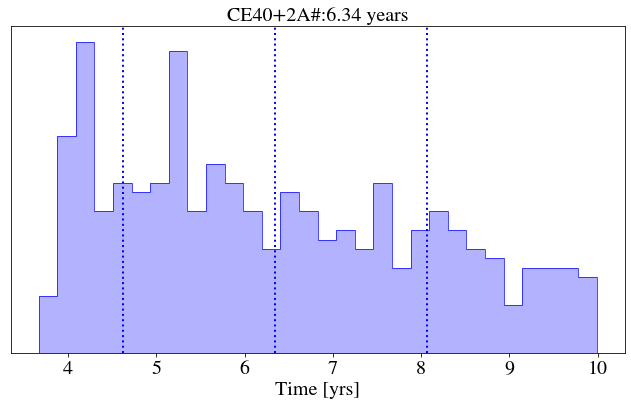

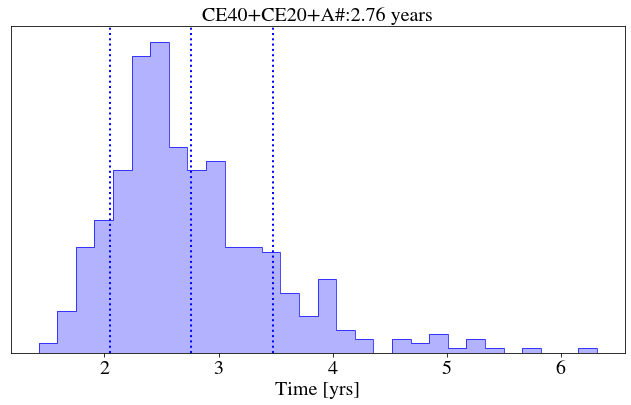

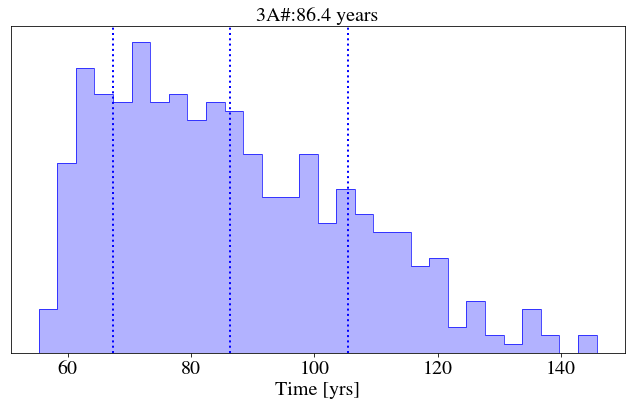

In [3]:
frac_error=radius_accuracy['10m']
for keys,value in network.items():
    detector=keys
    filepath=value
    listfiles=glob.glob('{}/nevents_*.txt'.format(filepath))
    if(len(listfiles)==0):
        break
    number_of_years=[]
    for file in listfiles:
        events,time,err=np.loadtxt(file,unpack=True)
        for i in range(len(events)):
            if (err[i]<frac_error):
                number_of_years.append(time[i])
                break
    mean=np.mean(number_of_years)
    stdev=np.std(number_of_years)
    plt.hist(number_of_years,bins=30,density=True,alpha=0.3,color='blue')
    plt.hist(number_of_years,histtype='step',density=True,bins=30,alpha=0.7,color='blue')
    plt.axvline(mean,linestyle=':',linewidth=2,color='blue')
    plt.axvline(mean+stdev,linestyle=':',linewidth=2,color='blue')
    plt.axvline(mean-stdev,linestyle=':',linewidth=2,color='blue')
    plt.xlabel("Time [yrs]")
    plt.yticks([])
    plt.title(str(keys)+":"+str(mean)[0:4]+" years")
    plt.show()
    

